In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('temperatures.csv')
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


In [4]:
df.shape

(117, 18)

In [5]:
df.isnull().sum()

YEAR       0
JAN        0
FEB        0
MAR        0
APR        0
MAY        0
JUN        0
JUL        0
AUG        0
SEP        0
OCT        0
NOV        0
DEC        0
ANNUAL     0
JAN-FEB    0
MAR-MAY    0
JUN-SEP    0
OCT-DEC    0
dtype: int64

In [6]:
df=df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YEAR     117 non-null    float64
 1   JAN      117 non-null    float64
 2   FEB      117 non-null    float64
 3   MAR      117 non-null    float64
 4   APR      117 non-null    float64
 5   MAY      117 non-null    float64
 6   JUN      117 non-null    float64
 7   JUL      117 non-null    float64
 8   AUG      117 non-null    float64
 9   SEP      117 non-null    float64
 10  OCT      117 non-null    float64
 11  NOV      117 non-null    float64
 12  DEC      117 non-null    float64
 13  ANNUAL   117 non-null    float64
 14  JAN-FEB  117 non-null    float64
 15  MAR-MAY  117 non-null    float64
 16  JUN-SEP  117 non-null    float64
 17  OCT-DEC  117 non-null    float64
dtypes: float64(18)
memory usage: 16.6 KB


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x = df.iloc[:,0:1]
y = df.iloc[:,13:14]

x_inp=np.array(x)
y_inp=np.array(y)


x_train,x_test,y_train,y_test=train_test_split(x_inp,y_inp,test_size=0.3,random_state=0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

x_train.reshape(-1,1)
y_train.reshape(-1,1)
model = LinearRegression()
model.fit(x_train,y_train)


(81, 1)
(81, 1)
(36, 1)
(36, 1)


LinearRegression()

In [8]:
y_pred=model.predict(x_test)

from sklearn import metrics


r_square = metrics.r2_score(y_test, y_pred)
print('R-Square Error:', r_square)

#Model Evaluation using Mean Square Error (MSE)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)
)
#Model Evaluation using Root Mean Square Error (RMSE)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#Model Evaluation using Mean Absolute Error (MAE)
print('Maean absolute Error :', metrics.mean_absolute_error(y_test,y_pred))

R-Square Error: 0.6832202846026354
Mean Squared Error: 0.14516479343842795
Root Mean Squared Error: 0.3810049782331301
Maean absolute Error : 0.2501753025103757


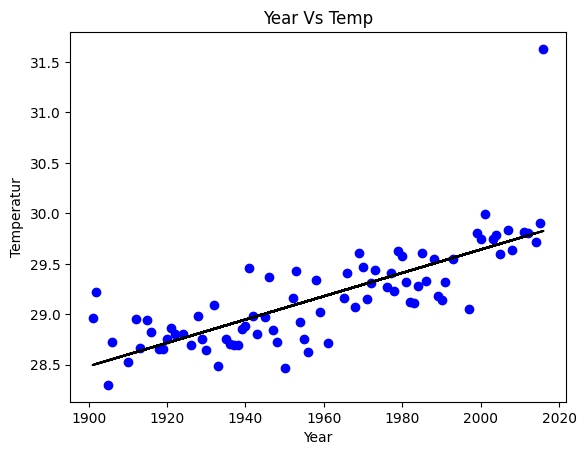

In [9]:
plt.scatter(x_train, y_train, color='Blue')
plt.plot(x_train, model.predict(x_train), color='Black')
plt.title('Year Vs Temp')
plt.xlabel('Year')
plt.ylabel('Temperatur')
plt.show()

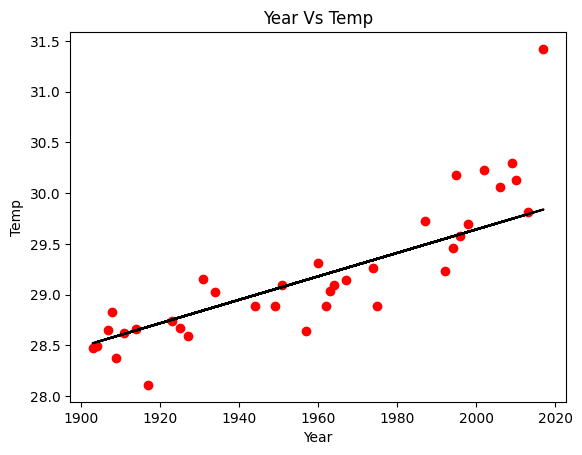

In [10]:
#Grades Vs Time to Study visualization on Test Data
plt.scatter(x_test, y_test, color='Red')
plt.plot(x_test, model.predict(x_test), color='Black')
plt.title('Year Vs Temp')
plt.xlabel('Year')
plt.ylabel('Temp')
plt.show()

In [10]:
x=pd.DataFrame([2050])
x=np.array(x)
x.reshape(-1,1)
print(model.predict(x))

[[30.21972509]]


In [11]:
x_jan = df.iloc[:,0:1] # Year
y_jan = df.iloc[:,1:2] # Jan

x_jan_inp=np.array(x_jan)
y_jan_inp=np.array(y_jan)


x_jan_train,x_jan_test,y_jan_train,y_jan_test=train_test_split(x_jan_inp,y_jan_inp,test_size=0.3,random_state=0)

x_jan_train.reshape(-1,1)
y_jan_train.reshape(-1,1)
model_jan = LinearRegression()
model_jan.fit(x_jan_train,y_jan_train)

y_jan_pred=model_jan.predict(x_jan_test)

r_square = metrics.r2_score(y_jan_test, y_jan_pred)
print('R-Square Error:', r_square)

#Model Evaluation using Mean Square Error (MSE)
print('Mean Squared Error:', metrics.mean_squared_error(y_jan_test, y_jan_pred)
)
#Model Evaluation using Root Mean Square Error (RMSE)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_jan_test, y_jan_pred)))
#Model Evaluation using Mean Absolute Error (MAE)
print('Maean absolute Error :', metrics.mean_absolute_error(y_jan_test,y_jan_pred))

R-Square Error: 0.27921723515312413
Mean Squared Error: 0.6080338203121165
Root Mean Squared Error: 0.7797652341006981
Maean absolute Error : 0.6231302838065338


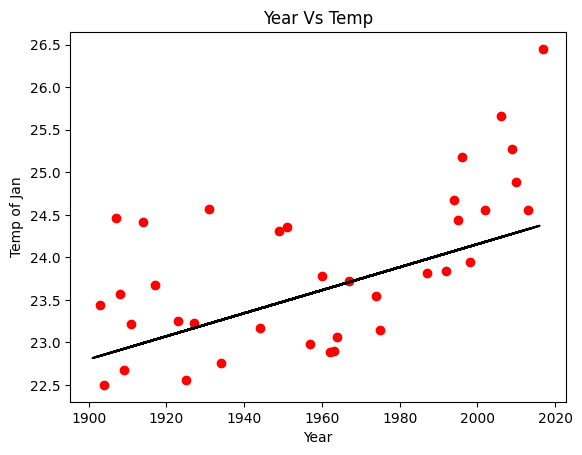

In [12]:
#Grades Vs Time to Study visualization on Test Data
plt.scatter(x_jan_test, y_jan_test, color='Red')
plt.plot(x_jan_train, model_jan.predict(x_jan_train), color='Black')
plt.title('Year Vs Temp')
plt.xlabel('Year')
plt.ylabel('Temp of Jan')
plt.show()

In [13]:
x_may = df.iloc[:,0:1] # Year
y_may = df.iloc[:,5:6] # Jan

x_may_inp=np.array(x_may)
y_may_inp=np.array(y_may)


x_may_train,x_may_test,y_may_train,y_may_test=train_test_split(x_may_inp,y_may_inp,test_size=0.3,random_state=0)

x_may_train.reshape(-1,1)
y_may_train.reshape(-1,1)
model_may = LinearRegression()
model_may.fit(x_may_train,y_may_train)

y_may_pred=model_may.predict(x_may_test)

r_square = metrics.r2_score(y_may_test, y_may_pred)
print('R-Square Error:', r_square)

#Model Evaluation using Mean Square Error (MSE)
print('Mean Squared Error:', metrics.mean_squared_error(y_may_test, y_may_pred)
)
#Model Evaluation using Root Mean Square Error (RMSE)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_may_test, y_may_pred)))
#Model Evaluation using Mean Absolute Error (MAE)
print('Maean absolute Error :', metrics.mean_absolute_error(y_may_test,y_may_pred))

R-Square Error: 0.25143356288571406
Mean Squared Error: 0.46545837955863983
Root Mean Squared Error: 0.6822451022606464
Maean absolute Error : 0.5496247604165327


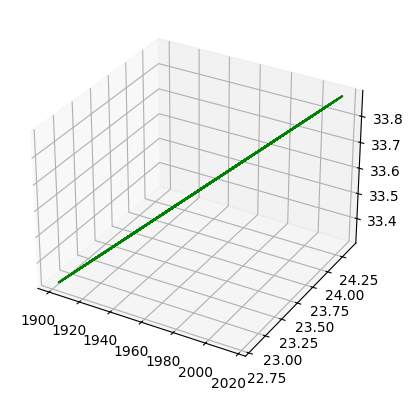

In [14]:
ax=plt.axes(projection='3d')
x_1=x_train
y_1=model_jan.predict(x_train)
z_1=model_may.predict(x_train)

ax.plot3D(x_1,y_1,z_1,'green')